In [2]:
!pip install geopandas

# Project Details:
## The project was data analysis on Property Sales in Detroit City Michigan State
### The data was obtained from web "This City of Detroit Open Data Portal"
#### For exploration of the data 
###### https://data.detroitmi.gov/datasets/detroitmi::property-sales/about

## Using the dataset to answer the following questions:

##### 1. Total unit of parcel sold in each year
##### 2. The sum of sales in each year from 2018 above.
##### 3. Comparing and Total count sold per year in each street


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import datetime as dt

In [4]:
#import the data into the python
file="https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/Property_Sales_Detroit/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
data1=gpd.read_file(file)
data=data1.copy()

In [5]:
#Exploration of the data 
data.head(5)
#data.columns

,sale_id,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,sale_date,sale_price,...,grantee,liber_page,term_of_sale,sale_verification,sale_instrument,property_transferred_percentage,property_class_code,economic_condition_factor_neigh,ESRI_OID,geometry
0,3887974,22078113.,8473 PENROD,8473,,PENROD,,1,1388361600000,1,...,USA PROPERTY INVESTMENT 15 LLP,,MULTI PARCEL SALE,PROPERTY TRANSFER AFFIDAVIT,PTA,0,401,NaN,403627,POINT (13433190.76873 313822.68890)
1,3887979,22078115.,8457 PENROD,8457,,PENROD,,1,1398729600000,0,...,"CARTER, KIMBERLY",51514:803,21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,100,401,NaN,403628,POINT (13433193.85212 313742.73024)
2,4460824,22078116-7,8449 PENROD,8449,,PENROD,,1,1597881600000,0,...,"ALEXANDER, ALEXIS",2020242364,21-NOT USED/OTHER,,QC,100,401,NaN,403629,POINT (13433195.58341 313697.76280)
3,4399247,22078116-7,8449 PENROD,8449,,PENROD,,1,1538438400000,11000,...,"ALEXANDER, LEO",2018298554,21-NOT USED/OTHER,DEED,WD,100,401,NaN,403630,POINT (13433195.58341 313697.76280)
4,4399299,22078118.,8439 PENROD,8439,,PENROD,,1,1539216000000,0,...,"DZAGULONES, MARIA",2018298272,21-NOT USED/OTHER,DEED,QC,100,401,NaN,403631,POINT (13433197.32363 313652.80696)


In [6]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   sale_id                          2000 non-null   int64   
 1   parcel_number                    2000 non-null   object  
 2   address                          2000 non-null   object  
 3   street_number                    2000 non-null   object  
 4   street_prefix                    1996 non-null   object  
 5   street_name                      2000 non-null   object  
 6   unit_number                      1996 non-null   object  
 7   sale_number                      2000 non-null   object  
 8   sale_date                        2000 non-null   int64   
 9   sale_price                       2000 non-null   int64   
 10  grantor                          2000 non-null   object  
 11  grantee                          2000 non-null   object  
 12

In [7]:
#To extract the datetime column from the dataset 
#checking, adding and converting the sale_date columns
data['sale_date']
data['convert_date']=data['sale_date']
data['convert_date']=data['convert_date']/1000
#data1['datae1']=pd.to_datetime(data1['datae1'])
def my_function1():
    #creating the function to append the compute the datatime into right format and append
    my_list=[]
    for item in data['convert_date']:
        item=dt.datetime.fromtimestamp(item)
        my_list.append(item)
    return my_list
        #data.head(5)
data['convert_date']=my_function1()

#Adding the Year, Months, Days columns to the table
data['Year']=data['convert_date'].dt.year #Extract the year, month, day, hour
data['Month']=data['convert_date'].dt.month
data['Day']=data['convert_date'].dt.day
data['Hour']=data['convert_date'].dt.hour
my_data=data.copy()
my_data.head(5)

,sale_id,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,sale_date,sale_price,...,property_transferred_percentage,property_class_code,economic_condition_factor_neigh,ESRI_OID,geometry,convert_date,Year,Month,Day,Hour
0,3887974,22078113.,8473 PENROD,8473,,PENROD,,1,1388361600000,1,...,0,401,NaN,403627,POINT (13433190.76873 313822.68890),2013-12-29 19:00:00,2013,12,29,19
1,3887979,22078115.,8457 PENROD,8457,,PENROD,,1,1398729600000,0,...,100,401,NaN,403628,POINT (13433193.85212 313742.73024),2014-04-28 20:00:00,2014,4,28,20
2,4460824,22078116-7,8449 PENROD,8449,,PENROD,,1,1597881600000,0,...,100,401,NaN,403629,POINT (13433195.58341 313697.76280),2020-08-19 20:00:00,2020,8,19,20
3,4399247,22078116-7,8449 PENROD,8449,,PENROD,,1,1538438400000,11000,...,100,401,NaN,403630,POINT (13433195.58341 313697.76280),2018-10-01 20:00:00,2018,10,1,20
4,4399299,22078118.,8439 PENROD,8439,,PENROD,,1,1539216000000,0,...,100,401,NaN,403631,POINT (13433197.32363 313652.80696),2018-10-10 20:00:00,2018,10,10,20


In [8]:
my_data.describe(include='object') # summary information on the non-numeric columns

,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,grantor,grantee,liber_page,term_of_sale,sale_verification,sale_instrument,property_class_code,economic_condition_factor_neigh
count,2000,2000,2000,1996,2000,1996,2000,2000,2000,1996,2000,2000,2000,2000,4
unique,867,867,827,1,4,1,3,1293,1646,986,17,5,9,7,2
top,22078605.,6843 FAUST,6410,,FAUST,,1,DETROIT LAND BANK AUTHORITY,HUD,,21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,401,7R705
freq,9,9,10,1996,1509,1996,1925,138,48,1002,914,1306,961,1863,3


In [9]:
#my_data.columns[np.sum(my_data.isnull())!=0] #show the columns with missing values
my_data.columns[np.sum(my_data.isnull())==0] #show columns with no missing values

Index(['sale_id', 'parcel_number', 'address', 'street_number', 'street_name',
       'sale_number', 'sale_date', 'sale_price', 'grantor', 'grantee',
       'term_of_sale', 'sale_verification', 'sale_instrument',
       'property_transferred_percentage', 'property_class_code', 'ESRI_OID',
       'convert_date', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [10]:
my_data.columns[np.sum(my_data.isnull())!=0] #show the columns with missing values

Index(['street_prefix', 'unit_number', 'liber_page',
       'economic_condition_factor_neigh', 'geometry'],
      dtype='object')

In [11]:
#drop the column from the data
my_data=my_data[[ 'Year','sale_id', 'parcel_number', 'address', 'street_number', 'street_prefix',
       'street_name', 'unit_number', 'sale_number', 'sale_price',
       'grantor', 'grantee', 'term_of_sale', 'sale_verification',
       'sale_instrument', 'property_transferred_percentage',
       'property_class_code', 'economic_condition_factor_neigh']].reset_index(drop=True)
my_data.head(5)

,Year,sale_id,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,sale_price,grantor,grantee,term_of_sale,sale_verification,sale_instrument,property_transferred_percentage,property_class_code,economic_condition_factor_neigh
0,2013,3887974,22078113.,8473 PENROD,8473,,PENROD,,1,1,EE MENG PEH,USA PROPERTY INVESTMENT 15 LLP,MULTI PARCEL SALE,PROPERTY TRANSFER AFFIDAVIT,PTA,0,401,NaN
1,2014,3887979,22078115.,8457 PENROD,8457,,PENROD,,1,0,"MOORE, MAGGIE N","CARTER, KIMBERLY",21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,100,401,NaN
2,2020,4460824,22078116-7,8449 PENROD,8449,,PENROD,,1,0,"ALEXANDER, LEO","ALEXANDER, ALEXIS",21-NOT USED/OTHER,,QC,100,401,NaN
3,2018,4399247,22078116-7,8449 PENROD,8449,,PENROD,,1,11000,GRACE HOLDINGS LLC,"ALEXANDER, LEO",21-NOT USED/OTHER,DEED,WD,100,401,NaN
4,2018,4399299,22078118.,8439 PENROD,8439,,PENROD,,1,0,"WATKINS, ELLA","DZAGULONES, MARIA",21-NOT USED/OTHER,DEED,QC,100,401,NaN


In [12]:
#Checking the unique value in each columns 
for item in my_data.columns:
    unique_ct=my_data[item].nunique()
    print(item, unique_ct)

Year 13
sale_id 2000
parcel_number 867
address 867
street_number 827
street_prefix 1
street_name 4
unit_number 1
sale_number 3
sale_price 537
grantor 1293
grantee 1646
term_of_sale 17
sale_verification 5
sale_instrument 9
property_transferred_percentage 2
property_class_code 7
economic_condition_factor_neigh 2


In [82]:
set(my_data['Year'])

{2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023}

### Q1. Total unit of parcel sold in each year

C:\Users\THERESIA\AppData\Local\Temp/ipykernel_18340/1428319717.py:16: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(5)


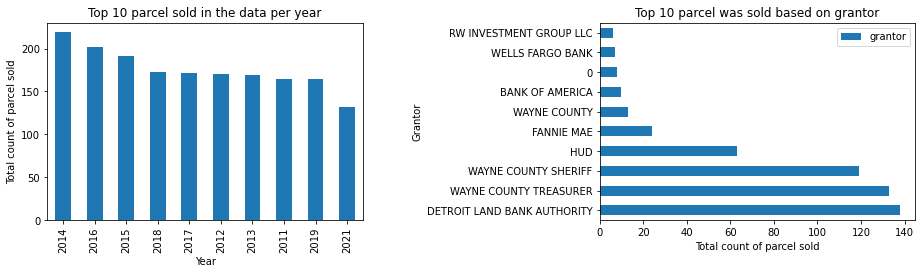

In [14]:
#For sample exploration of the data.
year_parcel_data=my_data['Year'].value_counts().head(10) #indicate how many parcel was sold in the data per year
grantor_data=my_data['grantor'].value_counts().head(10) #indicate how many parcel was sold based on grantor
fig=plt.figure(figsize=(14,5))
ax1=plt.subplot(1,2,1)
year_parcel_data.plot(kind='bar')
ax1.set_ylabel('Total count of parcel sold')
ax1.set_xlabel('Year')
ax1.set_title('Top 10 parcel sold in the data per year')

ax2=plt.subplot(1,2,2)
grantor_data.plot(kind='barh')
ax2.set_ylabel('Grantor')
ax2.set_xlabel('Total count of parcel sold')
ax2.set_title('Top 10 parcel was sold based on grantor')
plt.tight_layout(5)
plt.legend()
plt.show()

In [15]:
my_data_2021=my_data[my_data['Year']==2021]
my_data_2021.grantor.value_counts().head(10) #list of top 5 highest grantor that trade in the dataset in 2021
#my_data[my_data['grantor']==0]

DETROIT LAND BANK AUTHORITY            14
WAYNE COUNTY TREASURER                  3
BROWN, LEROY                            2
HOMES GALORE LLC                        2
DETROIT RESIDENTIAL OPPORTUNITY FUN     2
OPISAS MI2 LLC                          2
OSEI, KOFI                              2
IMPULSE MANAGEMENT LLC                  2
KING, IASIA                             2
HUSSEIN, CHRISTINE                      1
Name: grantor, dtype: int64

In [16]:
#my_data.head(5)
my_data_2022=my_data[my_data['Year']==2022]
my_data_2022.grantor.value_counts().head(10) #list of top 5 highest grantor that trade in the dataset in 2022
#my_data[my_data['grantor']==0]

DETROIT LAND BANK AUTHORITY    10
0                               8
WEEKS, DANA                     2
MARSOUMI INVESTMENT LLC         2
KETER GROUP LLC                 2
NISUS REAL ESTATE LLC           2
LA CASA REAL LC                 2
M&F HOUSING LLC                 2
GOLDEN, SHAMEL JAMES            1
ASHFORD, DESTINEE               1
Name: grantor, dtype: int64

In [17]:
my_data_2023=my_data[my_data['Year']==2023]
my_data_2023.grantor.value_counts().head(10) #list of top 5 highest grantor that trade in the dataset in 2023
#my_data[my_data['grantor']==0]
#For the moment data show few information about 2023 because the data was update September 2023

JUAREZ, DENNIS               1
MOHAMAD MUSA LIVING TRUST    1
VASQUEZ, VINCENT             1
VPM 1 LLC                    1
BIG SALE INVESTMENT LLC      1
Name: grantor, dtype: int64

In [18]:
#Cleaning the dataset
#my_data.isna().sum() # Understanding the sum of N/A in every columns
#my_data.loc[my_data.duplicated()] #which one of the column are duplicated
my_data.loc[my_data.duplicated(subset=['address'])].head(5) #which indicates that address registered more than one
####//// We observed that some of the data are duplicated e.g appear twice but in different year


,Year,sale_id,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,sale_price,grantor,grantee,term_of_sale,sale_verification,sale_instrument,property_transferred_percentage,property_class_code,economic_condition_factor_neigh
3,2018,4399247,22078116-7,8449 PENROD,8449,,PENROD,,1,11000,GRACE HOLDINGS LLC,"ALEXANDER, LEO",21-NOT USED/OTHER,DEED,WD,100,401,NaN
5,2017,4333460,22078118.,8439 PENROD,8439,,PENROD,,1,3800,"WATKINSS, ELLA V","DZAGULONES,MARIA",03-ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,QC,100,401,NaN
8,2021,4452971,22078122.,8401 PENROD,8401,,PENROD,,1,22000,CHIRON VENTURES INC,"JUAREZ, DENNIS",03-ARM'S LENGTH,,PTA,100,401,NaN
9,2018,4375436,22078122.,8401 PENROD,8401,,PENROD,,1,11000,DETROIT INVEST 2017 LLC,CHIRON VENTURES INC,03-ARM'S LENGTH,DEED,QC,100,401,NaN
11,2015,4262960,22078123.,8327 PENROD,8327,,PENROD,,1,0,JOHN R PROPERTIES LLC,"LUCAS BROWN, KRISHENDA",21-NOT USED/OTHER,,QC,100,401,NaN


### We want to filter the data from 2018 above continuously

##### Q2. The sum of sales in each year from 2018 above.

In [19]:
#Sorting the dataset by year that the parcel was sold 
#df.sort_values(by=['Column_name'], ascending=True)
#my_data.value_counts().sum()
set(my_data['Year']) # show year distinct in the dataset 
data2018_above=my_data[my_data['Year']>=2018] # Filter the dataset from 2018 above
data=data2018_above.copy()
# let now clean and remove the duplicated data in the dataset

In [22]:
#data.loc[data.duplicated(subset=['address'])]
data=data.drop_duplicates('address', keep='first').reset_index(drop=True) #drop all duplicate and keep the first data 
data.head(5)

,Year,sale_id,parcel_number,address,street_number,street_prefix,street_name,unit_number,sale_number,sale_price,grantor,grantee,term_of_sale,sale_verification,sale_instrument,property_transferred_percentage,property_class_code,economic_condition_factor_neigh
0,2020,4460824,22078116-7,8449 PENROD,8449,,PENROD,,1,0,"ALEXANDER, LEO","ALEXANDER, ALEXIS",21-NOT USED/OTHER,,QC,100,401,NaN
1,2018,4399299,22078118.,8439 PENROD,8439,,PENROD,,1,0,"WATKINS, ELLA","DZAGULONES, MARIA",21-NOT USED/OTHER,DEED,QC,100,401,NaN
2,2023,4709418,22078122.,8401 PENROD,8401,,PENROD,,1,1,"JUAREZ, DENNIS","J & G HOME INVESTMENTS, LLC",21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,0,401,NaN
3,2022,4688179,22078126.,8297 PENROD,8297,,PENROD,,1,42000,STRIDE INVESTMENT GROUP INC,"YOUNG, VIRGIL",03-ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,100,401,NaN
4,2020,4461887,22078136.,8229 PENROD,8229,,PENROD,,1,57000,DELTA DETROIT LLC,ALAMOS REAL ESTATE LLC,03-ARM'S LENGTH,,WD,100,401,NaN


### Observation: 
##### 2019 was when the most highest parcel sold in the dataset

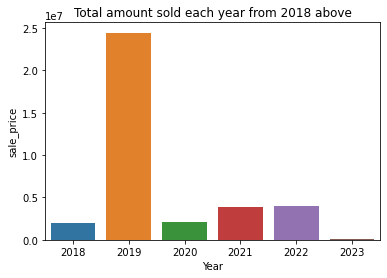

In [21]:
#Plotting seaborn barplot to understand sum of sales in each year from 2018 above*
sum_data=data.groupby('Year').sum().reset_index()
sns.barplot(x='Year', y='sale_price', data=sum_data)
plt.title('Total amount sold each year from 2018 above')

plt.show()

### Comparing sales of parcel in various street at different year interval 2020, 2021, 2022 and 2023

##### Q3. Comparing and Total count sold per year in each street

C:\Users\THERESIA\AppData\Local\Temp/ipykernel_18340/910501986.py:32: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


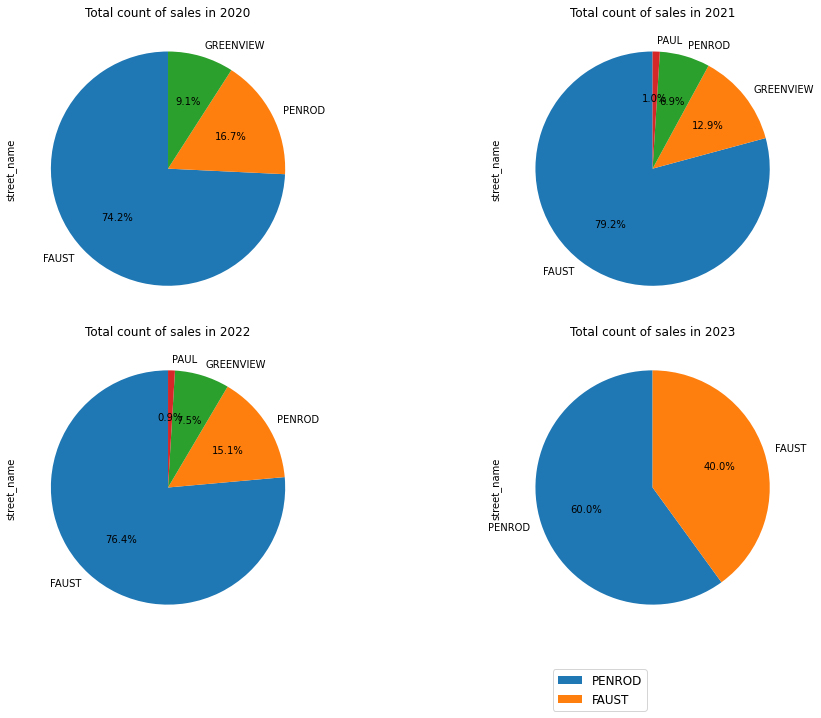

In [80]:
#Plotting seaborn barplot to understand sum of sales in each year from 2018 above*
data_2023=data[data['Year']==2023]
data_2022=data[data['Year']==2022]
data_2021=data[data['Year']==2021]
data_2020=data[data['Year']==2020]
#set(data_2022['street_name']) # show list of street in 2022
#data_2022.groupby['street_name'].value_counts()
datav_2023=data_2023.street_name.value_counts()
datav_2022=data_2022.street_name.value_counts()
datav_2021=data_2021.street_name.value_counts()
datav_2020=data_2020.street_name.value_counts()

fig1=plt.figure(figsize=(15, 10))
#fig1.colorbar('street_name')

ax=plt.subplot(2,2,1)
datav_2020.plot(kind='pie',startangle=90,autopct='%.1f%%', title='Total count of sales in 2020')

ax=plt.subplot(2,2,2)
datav_2021.plot(kind='pie',startangle=90,autopct='%.1f%%', title='Total count of sales in 2021')

ax=plt.subplot(2,2,3)
datav_2022.plot(kind='pie', startangle=90,autopct='%.1f%%',title='Total count of sales in 2022')

ax=plt.subplot(2,2,4)
datav_2023.plot(kind='pie', startangle=90,autopct='%.1f%%', title='Total count of sales in 2023')

#plt.colorbar(data['street_name'])
#plt.legend (fontsize='x-large')
#plt.legend(loc='upper left')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.1), fontsize=12)#put the legend in the box outside the plot
plt.tight_layout(1)

plt.show()

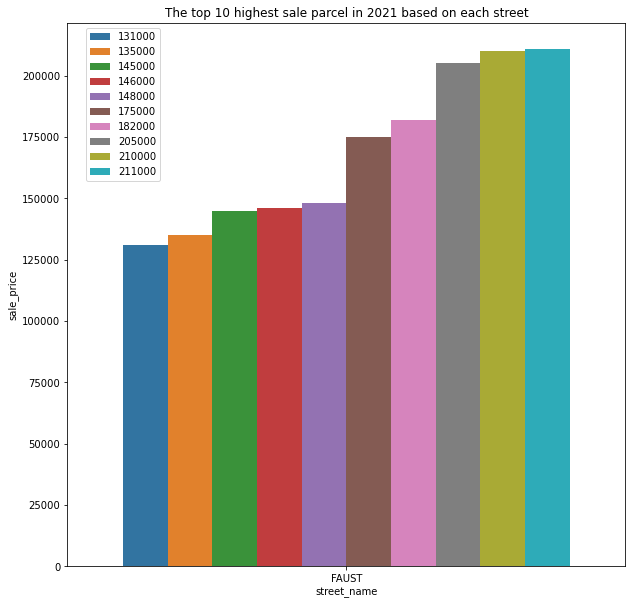

In [714]:
#Understand the highest sale parcel in 2021*
#most_frequent_item = max(lst, key=lst.count)
#max(data['sale_price'],data['sale_price'].count )
#data['sale_price'].sort 
#sorted(data['sale_price'], reverse=True)
data2021=data[data['Year']==2021]
highest_sales_2021=data2021.sort_values(by=['sale_price'], ascending=False).head(10)
highest_sales_2021
plt.figure(figsize=(10, 10))
sns.barplot(x='street_name', y='sale_price', data=highest_sales_2021, hue='sale_price')
plt.legend (loc='upper center', bbox_to_anchor= (0.1, 1.0))
plt.title('The top 10 highest sale parcel in 2021 based on each street')

plt.show()

In [699]:
data.corr()

,Year,sale_id,sale_price,property_transferred_percentage
Year,1.000000,0.820706,-0.039138,0.019855
sale_id,0.820706,1.000000,-0.045728,0.008257
sale_price,-0.039138,-0.045728,1.000000,0.036940
property_transferred_percentage,0.019855,0.008257,0.036940,1.000000


<AxesSubplot:>

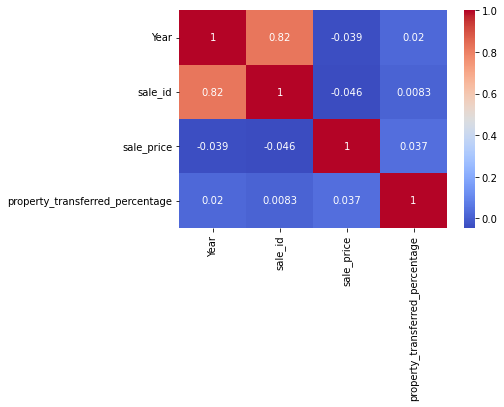

In [708]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') #check which feature in the dataset corrected 